# Exercices introductifs

Ces exercices ne demandent pour la plupart aucune connaissance particulière en python, ici, il s'agit de préparer le terrain pour avoir de bonnes bases et comprendre certains enjeux de programmation. Pour tous les exercices avec du code, vous devrez travailler avec un fichier de script python éditable avec gedit (ou assimilé) et le script devra être exécuté via le terminal.

## Exercice 1 : décortiquer un problème pour des publications

Ici, il est demandé de donner la marche à suivre pour résoudre le problème, aucune ligne de code n'est attendue. Idem, il n'est pas attendu d'algorithme particulier, même une idée peu efficace est acceptable. Ici, on appelera liste tout objet, que ce soit une liste pure (suite d'éléments de même type) ou les dictionnaires (pour lesquels, il est possible d'associer une clé à une valeur).

On dispose d'une API qui permet d'interroger une base de données de publications scientifiques. Pour celles-ci, il est possible d'avoir accès :
* pour un laboratoire
  * à la liste des auteurs affiliés au laboratoire
  * à la liste des identifiants des publications associées au laboratoire (DOI)
* pour un article dont on connait le DOI :
  * au titre
  * aux auteurs et à leurs affilitions (ils peuvent être associés à plusieurs laboratoires), pour chaque auteur, on supposera que le nom est toujours uniformisé et qu'il n'y a pas d'homonyme
  * le numéro
  * les pages
  * le nom du journal
  * au DOI (identifiant unique associé à un article)

  
1. On cherche à afficher des publications sur l'écran d'un laboratoire, pour cela, on veut afficher 5 publications distinctes tirées aléatoirement parmi les 300 dernières publications du laboratoire. Écrire en langage humain une ensemble d'opérations à réaliser pour faire cela.
2. Pour toutes les publications connues d'un laboratoire, on cherche à connaître les auteurs qui écrivent des articles ensemble, on veut donc avoir accès à toutes les paires d'auteurs appartenant au laboratoire ainsi qu'au nombre d'articles écrits en commun et leurs identifiants (DOI)


## Exercice 2 : rendre son code intelligible

Le code a été modifié à partir d'un exemple de la section 3.3 du livre *A Primer on Scientifi Programming
with Python* 5ème édition écrit par Hans Petter Langtangen

Ce code doit compter le nombre de fois où une lettre correspondant à une des quatres paires de base de l'ADN apparait (A,T,G,C).

Ré-écrire le code suivant en rendant plus explicite le nom des objets ou variables suivants : `a`,`b`,`c`,`d`,`e`,`f`, .

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Program counting the number of times that a given DNA base pair appears in a given sequence.
"""

# Importation des librairies

# Definition des fonctions
def f(a, b):
    i = 0 
    for c in d:
        if c == b:
            i += 1
    return i


# Programme principal
if __name__ == "__main__":
    d = 'ATGCGGACCTAT'
    b = 'C'
    e = f(d, b)
    # printf-style formatting
    print('{} appears {} times in {}'.format(b,e,d))


C appears 3 times in ATGCGGACCTAT


## Exercice 3 : commenter son code

Voici un exemple de code qui prend la valeur du signal $I$ mesuré pour une gamme étalon dont les concentrations initiales $C$ sont connues. Ensuite, on calcule l'absorbance définie comme :
$$A = - \log\left(\dfrac{I}{I_0}\right) $$ où $I_0$ est l'absorbance du blanc.

Ayant deux points, on extrait ensuite la droite affine passant par ces deux points pour avoir la réponse du détecteur.


*Commenter (en français ou en anglais) le code de manière à le rendre plus facilement lisible. Veiller à documenter les fonctions. Commenter suffisamment sans non plus en faire des tartines !*

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np

def calc_absorbance(I,I0):
    return -np.log(I/I0)

def calc_droite(Abs,Cs):
    a = (Abs[1]-Abs[0])/(Cs[1]-Cs[0])
    b = Abs[1]-a*Cs[1]
    return a,b

if __name__ == "__main__":
    Is = []
    Is.extend([611,281])
    Abs = []
    Cs = [2,4]
    I0 = 986
    for I in Is:
        Abs.append(calc_absorbance(I,I0))
    droite = calc_droite(Abs,Cs)
    print('pente : {}, ordonnée à l\'origine : {}'.format(*droite))    


pente : 0.38837114491892477, ordonnée à l'origine : -0.29818289440680945


# Déboguer son code

Rendre le code exécutable afin que les résultats et le comportement correspondent à celui attendu.

Pour une amplitude de 4 et une période de 8 secondes sur 100 pas pour les trois signaux, on attend le résultat suivant :
<img src="signaux-100.png" width="381" height="282">
Une fois que votre code semble correct, changer `pas` et prendre une valeur égale à 7 au lieu de 100.

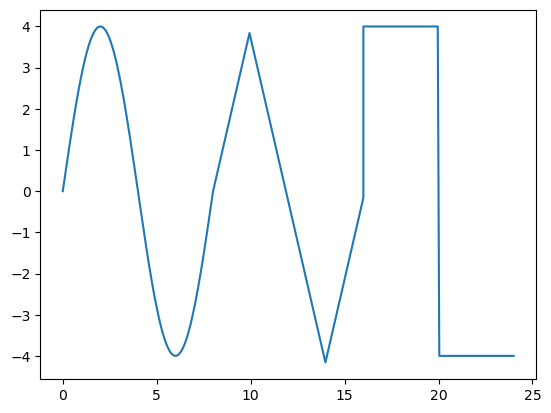

In [9]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Création de signaux périodiques

On crée un signal périodique, celui-ci sera ajouté à la suite des listes 
`time` et `signal` si jamais ces deux listes sont non vides, sinon on doit retourner une période.

Le but est ici d'avoir à la suite un signal sinusoïdal suivi d'un signal triangulaire suivi d'un signal carré. 
Le signal final doit être continu (excepté aux discontinuités du signal carré).
"""

#### Bad mauvais import de l'alias, du coup les fonctions dans le namespace numpy ne fonctionnent pas
#### en général lié à un mauvais copier coller depuis internet
#$$# import numpy
#### Good
import numpy as np #££$


# import de librairie pour avoir un aperçu du résultat, 
# PAS de bug dans les deux lignes ci-dessous
import matplotlib as mpl
import matplotlib.pyplot as plt

#$$# def make_sinusoid(amplitude, period=1, steps=100):
def make_sinusoid(amplitude, period=1, steps=100, time = None, signal = None): #££$
    """
    crée un signal sinusoïdal, retourne deux listes : 
    - une liste avec les abscisses temporelles,
    - l'autre avec le signal
    ces deux listes sont ajoutées aux listes `time` et `signal`, 
    avec un décalage de l'abscisse temporelle pour le temps si nécessaire
    
    Paramètres :
    - amplitude (float) : amplitude du signal
    - period (float) : période du signal
    - steps (int) : nombre de pas pour l'échantillonage de la fonction
    - time (list) :  liste à laquelle on va ajouter le signal
    """

    #### GOOD : initialisation d'objet mutables au sein de la fonction pour des arguments optionnels
    if time == None: #££$
        time = [] #££$
    if signal == None: #££$
        signal = [] #££$
        
    #### Bad en trop => conflit de nom de variable dans deux namespaces différents
    #### en déclarant time ici, on créé une variable interne à la fonction, ce qui fait
    #### que le extend va porter sur la variable interne à la fonction et pas la variable globale    
    #$$# time = list(np.linspace(0,period,steps))    
    
    #création de l'ensemble des abscisses temporelles
    #la fonction linspace va créer steps points régulièrement espacés entre 0 et period
    times = np.linspace(0,period,steps)

    #Calcul de l'amplitude pour chacun des pas de temps
    #### Good
    amplitudes = amplitude * np.sin(times*2*np.pi/period) #££$
    #### Bad : oubli de la pulsation
    #$$# amplitudes = amplitude * np.sin(times)
    
    
    #### Good : fait le shift
    if len(time)>0: #££$
        times += max(time) #££$
    
    time.extend(list(times))
    signal.extend(list(amplitudes))
    
    #### Bad : pas de valeur retour de la fonction
    return times,amplitudes #££$


#$$# def make_triangle(amplitude, period=1, steps=100):
def make_triangle(amplitude, period=1, steps=100, time = None, signal = None): #££$
    """
    crée un signal triangulaire, retourne deux listes : 
    - une liste avec les abscisses temporelles,
    - l'autre avec le signal
    ces deux listes sont ajoutées aux listes `time` et `signal`, 
    avec un décalage de l'abscisse temporelle pour le temps si nécessaire
    
    Paramètres :
    - amplitude (float) : amplitude du signal
    - period (float) : période du signal
    - steps (int) : nombre de pas pour l'échantillonage de la fonction
    - time (list) :  liste à laquelle on va ajouter le signal
    """

    if time == None: #££$
        time = [] #££$
    if signal == None: #££$
        signal = [] #££$    
    
    #calcul de la pente associée au signal qui sera l'incrément entre deux pas de temps
    slope = 4*amplitude/steps
    
    
    #création de l'ensemble des abscisses temporelles
    #la fonction linspace va créer steps points régulièrement espacés entre 0 et period
    times = np.linspace(0,period,steps)
    #amplitude du signal correspondant à chaque abscisse
    amplitudes = []
    
    #indice correspondant au pas de temps 
    current_step = 1 #££$
    #$$# current_step = 0
    amplitudes.append(0) #££$
    current_amplitude = 0
    """
    on fait un signal triangulaire découpé en 4 morceaux : 
    - lors du premier quart de période on incrémente d'une valeur égale à la pente
    - sur les deux quarts de période suivants on soustrait d'une valeur égale à la pente
    - lors du dernier quart de période on incrémente d'une valeur égale à la pente
    """
    while current_step<steps:
        if current_step < steps//4:
            current_amplitude += slope
            amplitudes.append(current_amplitude)
        elif current_step < 3*steps//4:
            current_amplitude -= slope
            amplitudes.append(current_amplitude)
        else:
            current_amplitude += slope
            amplitudes.append(current_amplitude)
        #### BAD :  non bouclage d'un while => boucle infinie
        current_step+=1 #££$
        
    if len(time)>0:#££$
        times += max(time)#££$
        
    time.extend(times)
    signal.extend(list(amplitudes))
    
    #### Bad : pas de valeur retour de la fonction
    return times,amplitudes #££$


#$$# def make_square(amplitude, period=1, steps=100):
def make_square(amplitude, period=1, steps=100, time = None, signal = None): #££$
    """
    crée un signal rectangulaire, retourne deux listes : 
    - une liste avec les abscisses temporelles,
    - l'autre avec le signal
    ces deux listes sont ajoutées aux listes `time` et `signal`, 
    avec un décalage de l'abscisse temporelle pour le temps si nécessaire
    
    Paramètres :
    - amplitude (float) : amplitude du signal
    - period (float) : période du signal
    - steps (int) : nombre de pas pour l'échantillonage de la fonction
    - time (list) :  liste à laquelle on va ajouter le signal
    """
    #création de l'ensemble des abscisses temporelles
    times = np.linspace(0,period,steps)
    amplitudes = []    
    for step in range(steps):
        if step < steps//2:
            amplitudes.append(amplitude)
        else:
            amplitudes.append(-amplitude)
    if len(time)>0:#££$
        times += max(time)#££$          
            
    time.extend(list(times))
    signal.extend(list(amplitudes))

    return times,amplitudes #££$



if __name__ == "__main__":
    time = []
    signal = []
    pas = 100


    times,amplitudes = make_sinusoid(4, 8,pas, time = time, signal = signal) #££$
    #$$# times,amplitudes = make_sinusoid(4, 8,pas)
    times,amplitudes = make_triangle(4, 8,pas, time = time, signal = signal) #££$
    #$$# times,amplitudes = make_triangle(4, 8,pas)
    times,amplitudes = make_square(4, 8,pas, time = time, signal = signal) #££$
    #$$# times,amplitudes = make_square(4, 8,pas)
    
    
    #Affichage du signal final, pas de bug dans les deux lignes ci-dessous
    plt.plot(time,signal)
    plt.show()
    